# Sample PCA analysis with Iris dataset

The following are required for this notebook:
- pip install matplotlib
- pip install scikit-learn

This notebook plots (and pickles) the Iris data set before and after Principal Component Analysis. Output is intended to be imported by a Flask application and passed to an HTML template. D3.js can be used to create scatterplots similar to the two shown below (only nicer, hopefully).

The following cell imports sckikit-learn and the data set. A PCA is performed with 4 principal components. 

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

# Import the infamous Iris Dataset
iris = datasets.load_iris()

# Keep only the first two features (Sepal length, width)
X = iris.data
Y = iris.target

# Perform PCA on 4D data, keeping 2 principal components
X_PCA = PCA(n_components=4).fit_transform(iris.data)

### Plot Original Data Set

Plot the Sepal width vs. Sepal length on the original data.

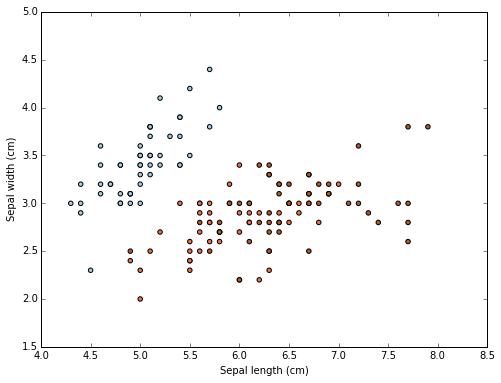

In [6]:
# Plot the first two features BEFORE doing the PCA
plt.figure(2, figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.show()

### Plot Data After PCA

After performing a PCA, the first two components are plotted. Note that the two components plotted are linear combinations of the original 4 features of the data set.

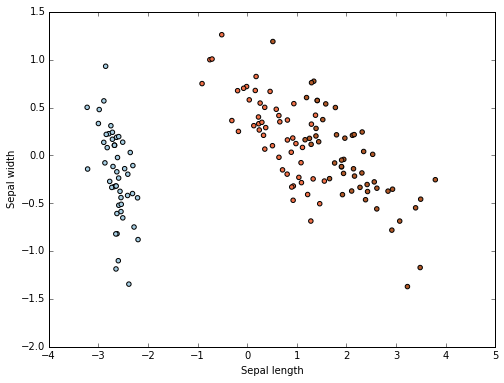

In [7]:
# Plot the first two principal components AFTER the PCA
plt.figure(2, figsize=(8, 6))

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

### Save Output

The Flask application will make use of the following [D3 Scatterplot example](http://bl.ocks.org/weiglemc/6185069). Data has to be in a particular format (see link for example), this cell flips the data sets into that format and pickles the output.

In [8]:
# Pickle pre- and post-PCA data
import pickle

features = []
for full_label in iris.feature_names:
    name = full_label[:-5].split() # remove trailing ' (cm)'
    features.append(name[0]+name[1].capitalize())
features.append("species")

# Create full set for Iris data
data1 = []
data_PCA = []
for i, vals in enumerate(X):
    row1 = dict()
    row_PCA = dict()
    for k, val in enumerate(np.append(X[i], iris.target_names[Y[i]])):
        row1[features[k]] = val
    data1.append(row1)
    for k, val in enumerate(np.append(X_PCA[i], iris.target_names[Y[i]])):
        row_PCA[features[k]] = val
    data_PCA.append(row_PCA)

pickle.dump(data1, open("pkl/data1.pkl", "wb"))
pickle.dump(data_PCA, open("pkl/data_PCA.pkl", "wb"))